In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


C:\Users\preksha\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Fetching Data

In [2]:
data = pd.read_csv("drama.csv")

In [3]:
# viewing data example to know how our data actually lools like
data.head()

,article_id,article_text
0,1.0,In Drama every world is a stage.
1,2.0,Everyone on the stage is doing drama .
2,3.0,Every world is a stage and is commonly said i...
3,4.0,The world commonly revolves around Drama and S...
4,5.0,Drama in every world leads to removal of stage...


In [4]:
#splitting the documents into list of sentences.
sentences = [] 
for s in data['article_text']:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [5]:
sentences[:5]

[['In Drama every world is a stage.'],
 ['Everyone on the stage is doing drama .'],
 ['Every world is a  stage and is commonly said in drama.'],
 ['The world commonly revolves around Drama and Stage.'],
 ['Drama in every world leads to removal of stage fear.']]

In [6]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['In', 'Drama', 'every', 'world', 'is', 'a', 'stage', '.'],
 ['Everyone', 'on', 'the', 'stage', 'is', 'doing', 'drama', '.'],
 ['Every',
  'world',
  'is',
  'a',
  'stage',
  'and',
  'is',
  'commonly',
  'said',
  'in',
  'drama',
  '.'],
 ['The',
  'world',
  'commonly',
  'revolves',
  'around',
  'Drama',
  'and',
  'Stage',
  '.'],
 ['Drama',
  'in',
  'every',
  'world',
  'leads',
  'to',
  'removal',
  'of',
  'stage',
  'fear',
  '.'],
 ['Every',
  'where',
  'in',
  'the',
  'world',
  'Drama',
  'is',
  'performed',
  'with',
  'great',
  'pomp',
  'and',
  'show',
  '.'],
 ['Character',
  'building',
  'is',
  'an',
  'integral',
  'part',
  'of',
  'Drama',
  'which',
  'is',
  'included',
  'in',
  'every',
  'part',
  'of',
  'the',
  'world',
  '.'],
 ['Setting',
  'of',
  'the',
  'Stage',
  'is',
  'very',
  'important',
  'in',
  'drama',
  '.'],
 ['Language',
  'of',
  'the',
  'play',
  'in',
  'Drama',
  'is',
  'very',
  'important',
  'as',
  'it',
  'is',
  

In [7]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [8]:
filtered_sentence

[['In', 'Drama', 'every', 'world', 'stage', '.'],
 ['Everyone', 'stage', 'drama', '.'],
 ['Every', 'world', 'stage', 'commonly', 'said', 'drama', '.'],
 ['The', 'world', 'commonly', 'revolves', 'around', 'Drama', 'Stage', '.'],
 ['Drama', 'every', 'world', 'leads', 'removal', 'stage', 'fear', '.'],
 ['Every', 'world', 'Drama', 'performed', 'great', 'pomp', 'show', '.'],
 ['Character',
  'building',
  'integral',
  'part',
  'Drama',
  'included',
  'every',
  'part',
  'world',
  '.'],
 ['Setting', 'Stage', 'important', 'drama', '.'],
 ['Language',
  'play',
  'Drama',
  'important',
  'considered',
  'integral',
  'part',
  'every',
  'part',
  'world',
  '.'],
 ['Drama',
  'leads',
  'overall',
  'devlopment',
  'individual',
  'practiswed',
  'every',
  'part',
  'world',
  '.'],
 ['The',
  'Discipline',
  ',',
  'Dedication',
  ',',
  'Organization',
  'sense',
  'collaboartion',
  'Theatre',
  'requires',
  'ar',
  'qualities',
  'easily',
  'transfer',
  'number',
  'fields',
  '

In [9]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [10]:
stemmed_sentences

[['In', 'drama', 'everi', 'world', 'stage', '.'],
 ['everyon', 'stage', 'drama', '.'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama', '.'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage', '.'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear', '.'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show', '.'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world',
  '.'],
 ['set', 'stage', 'import', 'drama', '.'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world',
  '.'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world',
  '.'],
 ['the',
  'disciplin',
  ',',
  'dedic',
  ',',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field',
  '.'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',

In [11]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [12]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['in', 'drama', 'everi', 'world', 'stage'],
 ['everyon', 'stage', 'drama'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world'],
 ['set', 'stage', 'import', 'drama'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world'],
 ['the',
  'disciplin',
  'dedic',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',
  'individu',
  'lifei e ',
  'disciplin',
  'dedic',
  'organ',
  'sens',
 

In [13]:
(line)

[['in', 'drama', 'everi', 'world', 'stage'],
 ['everyon', 'stage', 'drama'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world'],
 ['set', 'stage', 'import', 'drama'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world'],
 ['the',
  'disciplin',
  'dedic',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',
  'individu',
  'lifei e ',
  'disciplin',
  'dedic',
  'organ',
  'sens',
 

In [14]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [15]:
Distinct_Words

['one',
 'india',
 'alway',
 'strong',
 'collboart',
 'make',
 'measur',
 'artist',
 'disciplin',
 'fear',
 'need',
 'lead',
 'term',
 'help',
 'villag',
 'theatr',
 'lifei e ',
 'must',
 'us',
 'ar',
 'collabor',
 'program',
 'knowledg',
 'way',
 'easili',
 'fim',
 'qualiti',
 'drama',
 'perform',
 'i',
 'world',
 'therer',
 'play',
 'thing',
 'activ',
 'newspap',
 'pactic',
 'imporatnt',
 'e ',
 'languag',
 'befor',
 'number',
 'consid',
 'actor ',
 'educ',
 'enertatin',
 'medium',
 'includ',
 'the',
 'tool',
 'advertis',
 'around',
 'depict',
 'practisw',
 'function',
 'indian',
 'awar',
 'also',
 'cultur',
 'inspir',
 'care',
 'follow',
 'individu',
 'issu',
 'requir',
 'take',
 'fiction',
 'time',
 'ddsc',
 'stand',
 'to',
 'said',
 'organ',
 'transfer',
 'd',
 'social',
 'televis',
 'perosan',
 'host',
 'mass',
 'thyan',
 'opf',
 'trm',
 'live',
 'enertain',
 'power',
 'purpos',
 'influenti',
 'enter',
 'key',
 'mind',
 'inform',
 'file',
 'pillar',
 'lost',
 'non',
 'newspaer',


In [16]:
(words)

['in',
 'drama',
 'everi',
 'world',
 'stage',
 'everyon',
 'stage',
 'drama',
 'everi',
 'world',
 'stage',
 'commonli',
 'said',
 'drama',
 'the',
 'world',
 'commonli',
 'revolv',
 'around',
 'drama',
 'stage',
 'drama',
 'everi',
 'world',
 'lead',
 'remov',
 'stage',
 'fear',
 'everi',
 'world',
 'drama',
 'perform',
 'great',
 'pomp',
 'show',
 'charact',
 'build',
 'integr',
 'part',
 'drama',
 'includ',
 'everi',
 'part',
 'world',
 'set',
 'stage',
 'import',
 'drama',
 'languag',
 'play',
 'drama',
 'import',
 'consid',
 'integr',
 'part',
 'everi',
 'part',
 'world',
 'drama',
 'lead',
 'overal',
 'devlop',
 'individu',
 'practisw',
 'everi',
 'part',
 'world',
 'the',
 'disciplin',
 'dedic',
 'organ',
 'sens',
 'collaboart',
 'theatr',
 'requir',
 'ar',
 'qualiti',
 'easili',
 'transfer',
 'number',
 'field',
 'theatr',
 'lead',
 'key',
 'four',
 'term',
 'import',
 'individu',
 'lifei e ',
 'disciplin',
 'dedic',
 'organ',
 'sens',
 'collabor',
 'qualiti',
 'requir',
 'wor

In [17]:
len(line)

42

## Visualizing Data

In [18]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])
    

0 one
1 india
2 alway
3 strong
4 collboart
5 make
6 measur
7 artist
8 disciplin
9 fear
10 need
11 lead
12 term
13 help
14 villag
15 theatr
16 lifei e 
17 must
18 us
19 ar
20 collabor
21 program
22 knowledg
23 way
24 easili
25 fim
26 qualiti
27 drama
28 perform
29 i
30 world
31 therer
32 play
33 thing
34 activ
35 newspap
36 pactic
37 imporatnt
38 e 
39 languag
40 befor
41 number
42 consid
43 actor 
44 educ
45 enertatin
46 medium
47 includ
48 the
49 tool
50 advertis
51 around
52 depict
53 practisw
54 function
55 indian
56 awar
57 also
58 cultur
59 inspir
60 care
61 follow
62 individu
63 issu
64 requir
65 take
66 fiction
67 time
68 ddsc
69 stand
70 to
71 said
72 organ
73 transfer
74 d
75 social
76 televis
77 perosan
78 host
79 mass
80 thyan
81 opf
82 trm
83 live
84 enertain
85 power
86 purpos
87 influenti
88 enter
89 key
90 mind
91 inform
92 file
93 pillar
94 lost
95 non
96 newspaer
97 his 
98 struggl
99 type
100 provid
101 while
102 collaboart
103 devlop
104 commun
105 charact
106 life
1

In [19]:
word_occurance_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_occurance_matrix.fill(0)

In [20]:
for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_occurance_matrix[i][x] = word_occurance_matrix[i][x] +1
                continue

In [21]:
print(word_occurance_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Okapi BM25

In [22]:
word_weight_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_weight_matrix.fill(0)
    
    
avg_length=np.mean(word_occurance_matrix.sum(axis=1))
    
length_size=np.array(1.5*word_occurance_matrix.sum(axis=1)/avg_length)
    
    
    
isf=np.array(np.log(len(line)/np.count_nonzero(word_occurance_matrix,axis=0)))
denominator=np.empty(shape=(len(line),len(Distinct_Words)))
for i in range(len(line)):
    denominator[i,:]=(word_occurance_matrix[i,:]+length_size[i]+0.5)
    
word_weight_matrix=(word_occurance_matrix*isf)/(denominator)
word_weight_matrix    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# RNN Similarity measure 

In [23]:
sum_weights=np.sum(word_weight_matrix,axis=1)

product_weight=np.empty(shape=(len(line),len(line)))
for i in range(len(line)):
    for j in range(len(line)):
        product_weight[i][j]=sum(word_weight_matrix[i,:]*word_weight_matrix[j,:])
product_weight
similarity_matrix=np.empty(shape=np.shape(product_weight))

In [24]:
for i in range(len(line)):
    for j in range(len(line)):
        similarity_matrix[i,j]= 1-((2*(sum_weights[i] - product_weight[i,j])*(sum_weights[j] - product_weight[i,j]))/((sum_weights[i]*(sum_weights[j] - product_weight[i,j])) + (sum_weights[j]*(sum_weights[i] - product_weight[i,j]))))
similarity_matrix

array([[0.91444069, 0.28223916, 0.41147829, ..., 0.        , 0.        ,
        0.        ],
       [0.28223916, 1.39456956, 0.23926549, ..., 0.        , 0.        ,
        0.        ],
       [0.41147829, 0.23926549, 1.04482954, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.63770846, 0.0216404 ,
        0.63770846],
       [0.        , 0.        , 0.        , ..., 0.0216404 , 0.9284064 ,
        0.0216404 ],
       [0.        , 0.        , 0.        , ..., 0.63770846, 0.0216404 ,
        0.63770846]])

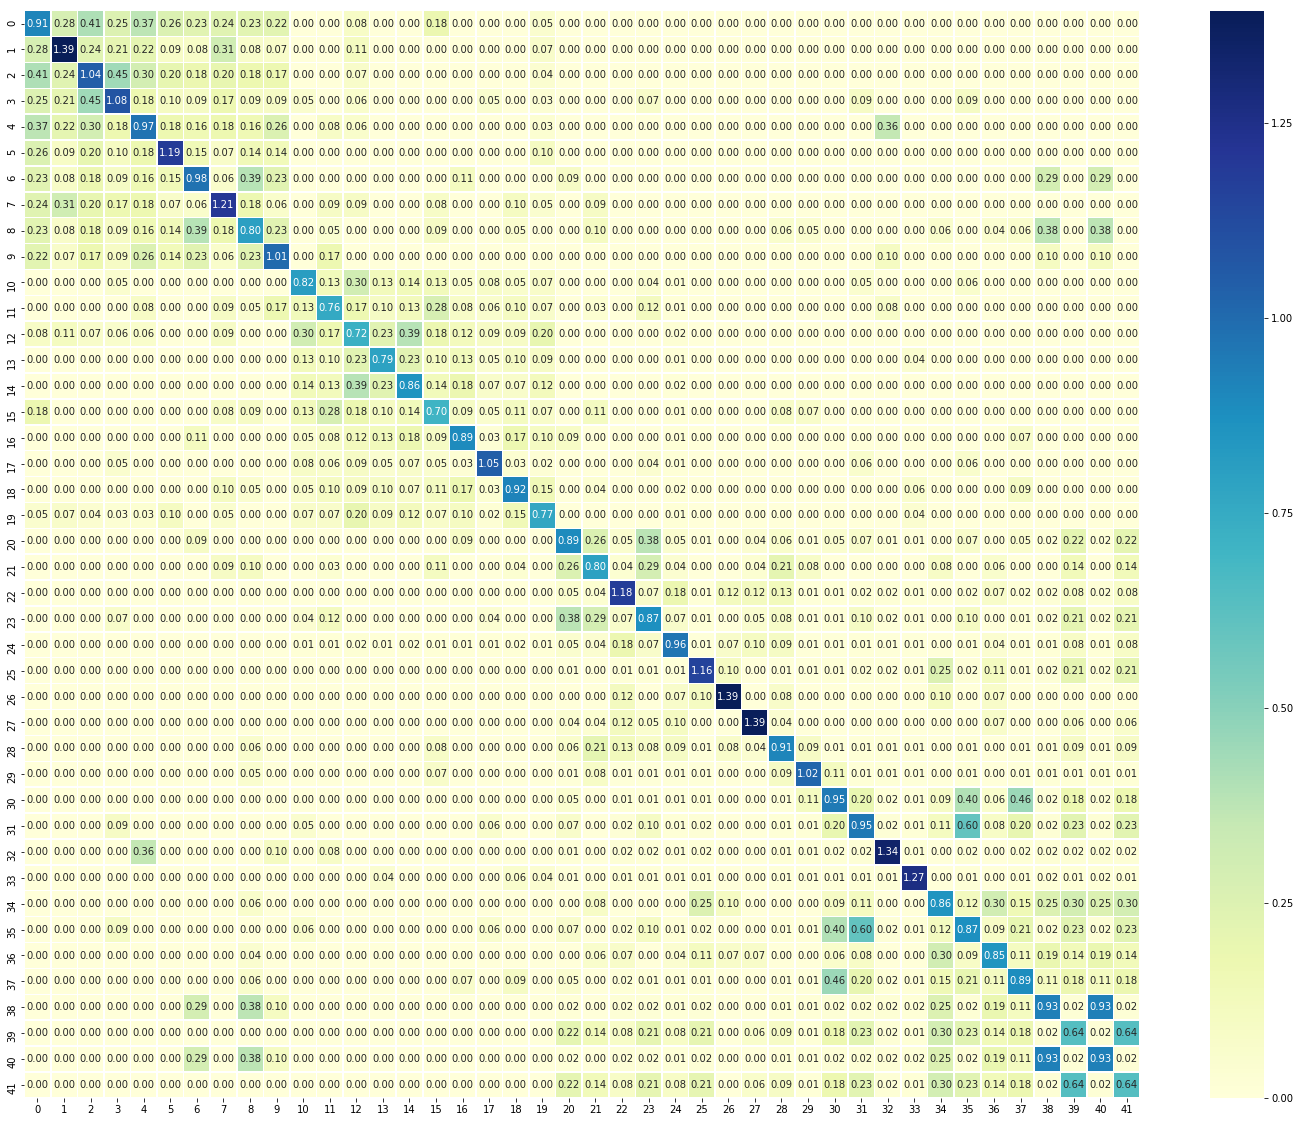

In [25]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(similarity_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

In [26]:
distance_matrix=np.max(similarity_matrix)-similarity_matrix

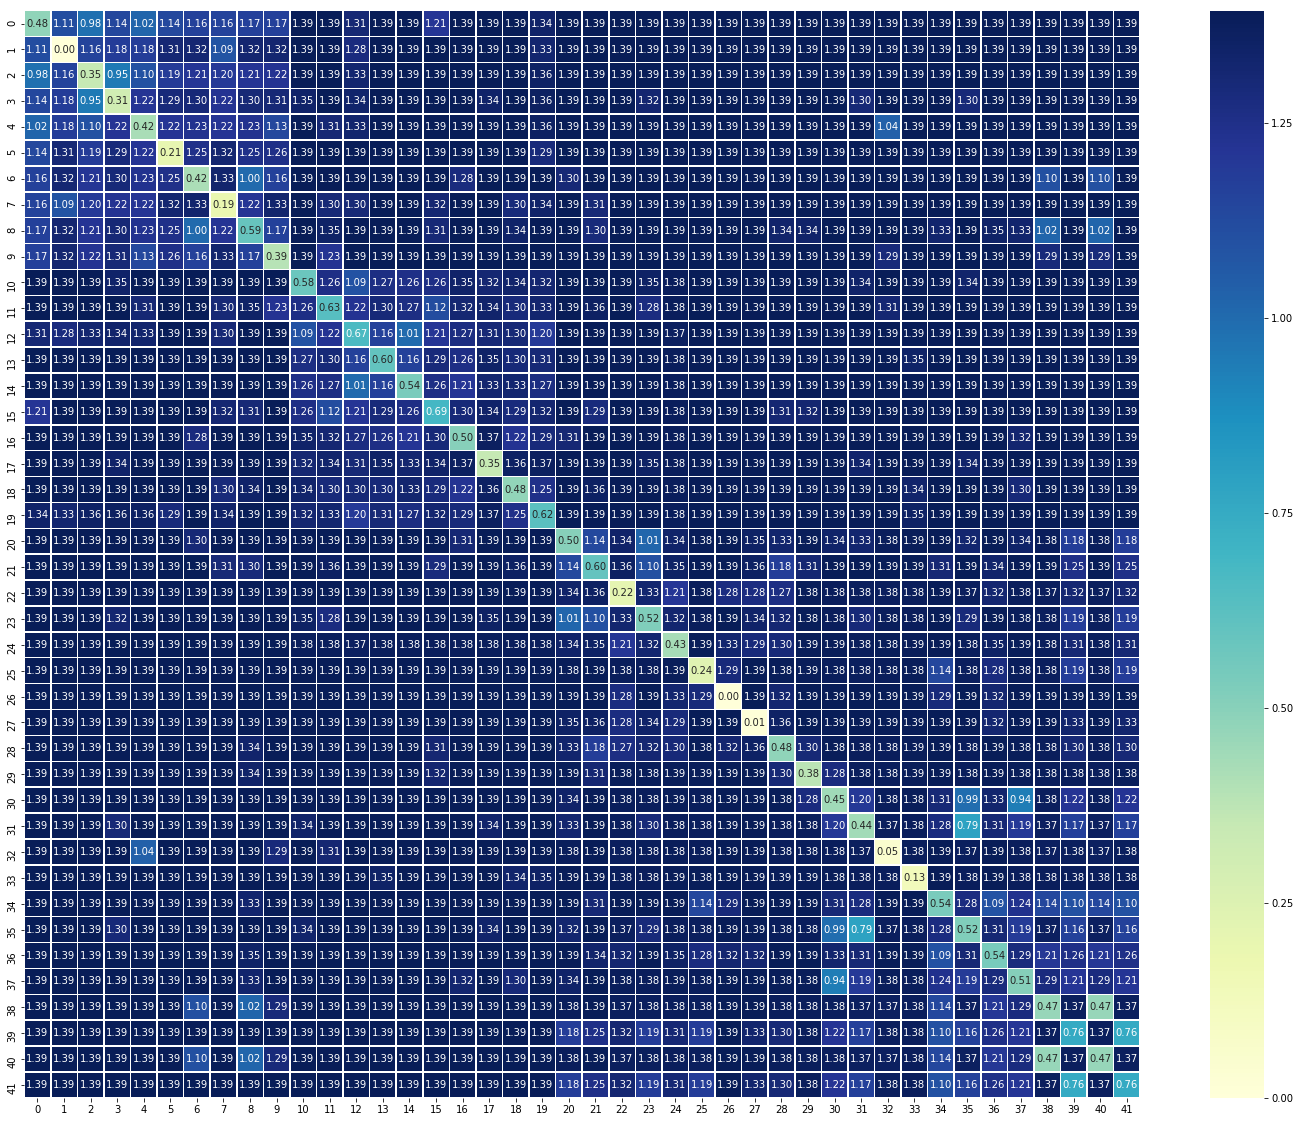

In [27]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(distance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

# Clustering

### K-Medoids

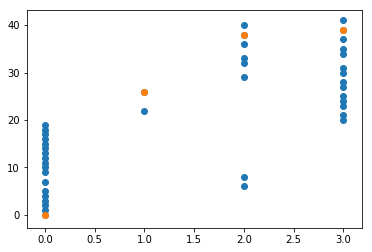

In [28]:
from pyclustering.cluster import kmedoids
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

##############################################################################################################################

matrix = distance_matrix
M, C = kMedoids(matrix, 4)

a=np.empty(shape=len(line))
for i in range(len(C)):
    for j in (C[i]):
        a[j]=i
    
#print(a)
arr = np.empty(shape=len(line))
for i in range(len(line)):
    arr[i]=i
m=[0,1,2,3]

#plt.figure(figsize=(15,10))
plt.scatter(a, arr)
plt.scatter(m,M)

### K-Means

[1 1 1 1 1 1 2 1 2 2 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 3 0 0 3 0 0 3 3 0 0 0
 0 2 0 2 0]


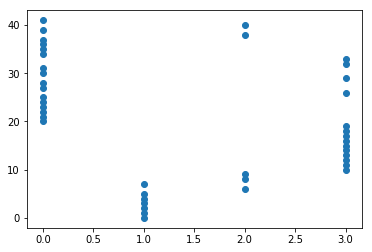

In [31]:
mat = distance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)
#arr = [1, 2, 3 ,4, 5 , 6, 7, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,39]

#plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)

# Cosine Similarity

In [32]:
Csimilarity_matrix=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_weight_matrix[i], word_weight_matrix[j])
        norm_i = np.linalg.norm(word_weight_matrix[i])
        norm_j = np.linalg.norm(word_weight_matrix[j])
        Csimilarity_matrix[i, j] = dot_product/(norm_i*norm_j)
Csimilarity_matrix

array([[1.        , 0.24791312, 0.41253584, ..., 0.        , 0.        ,
        0.        ],
       [0.24791312, 1.        , 0.19029919, ..., 0.        , 0.        ,
        0.        ],
       [0.41253584, 0.19029919, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.02811223,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.02811223, 1.        ,
        0.02811223],
       [0.        , 0.        , 0.        , ..., 1.        , 0.02811223,
        1.        ]])

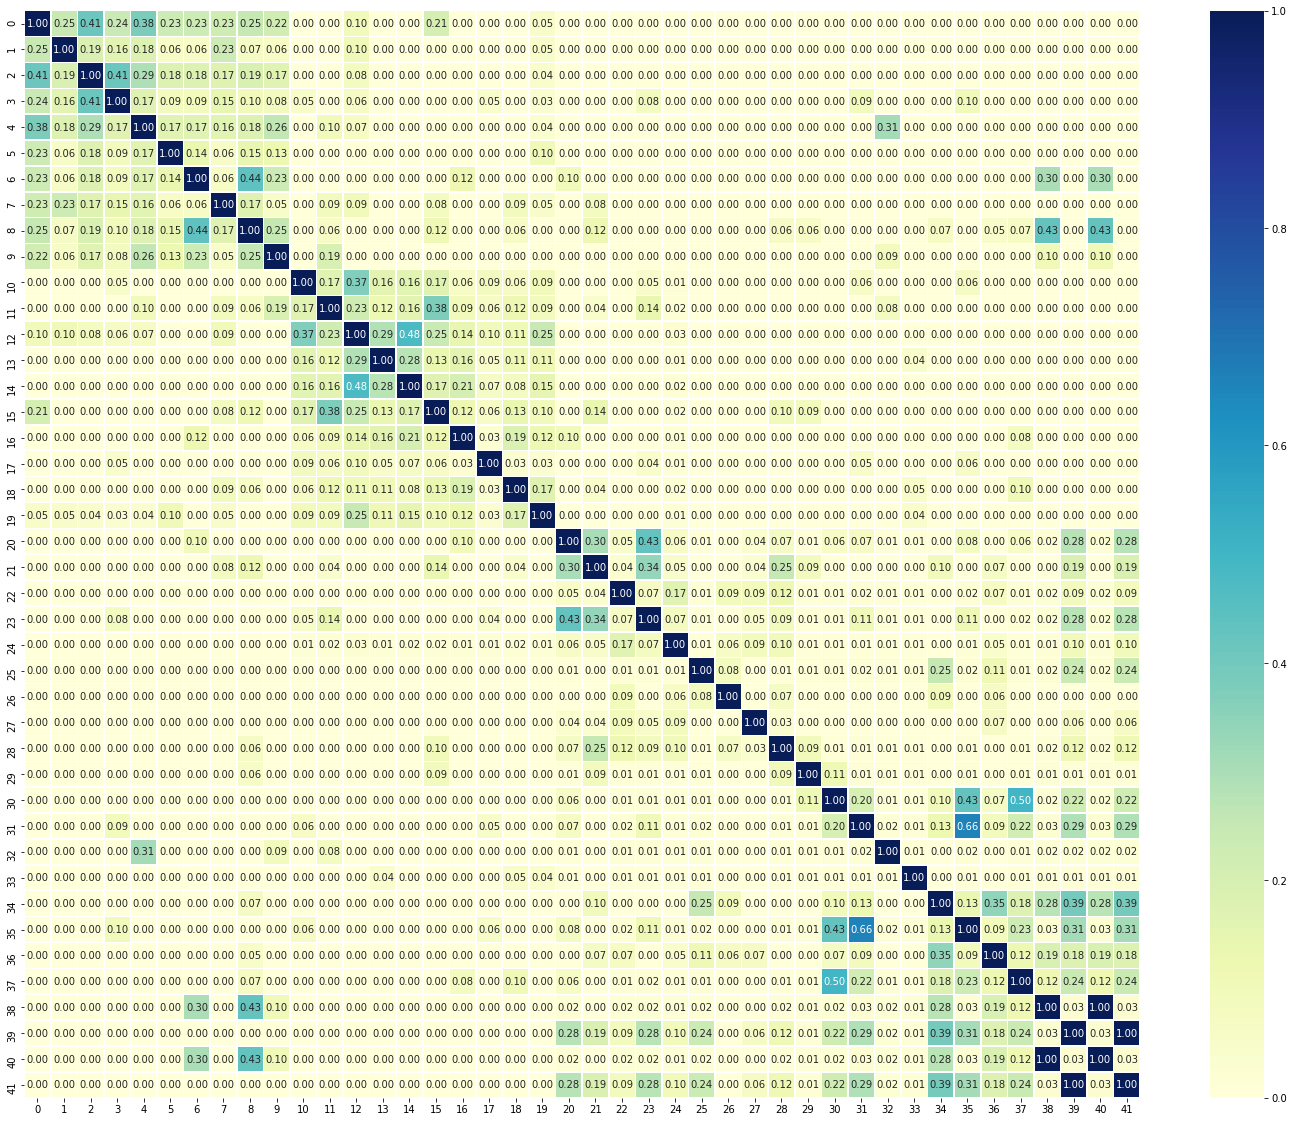

In [33]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Csimilarity_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

In [34]:
Cdistance_matrix=1-Csimilarity_matrix

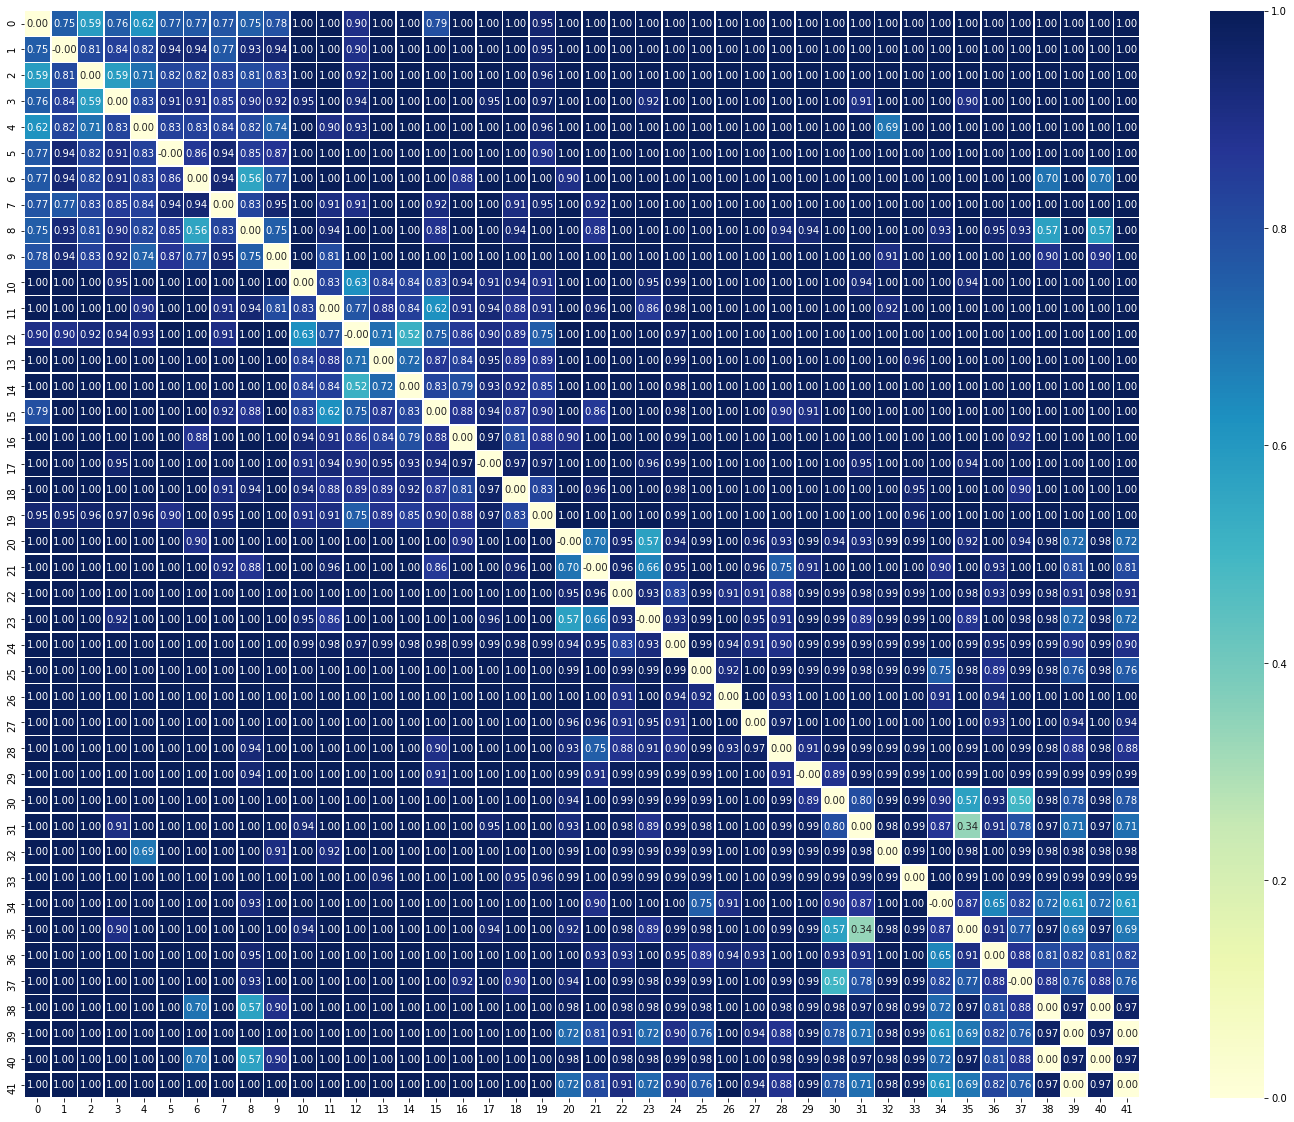

In [35]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Cdistance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

# Clustering

### K-Medoids

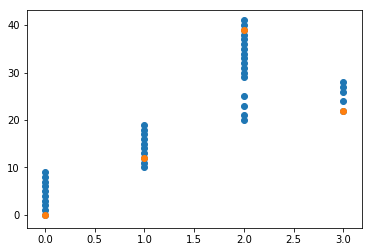

In [36]:
from pyclustering.cluster import kmedoids
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

##############################################################################################################################

matrix = Cdistance_matrix
M, C = kMedoids(matrix, 4)


##############################################################################################################################

a=np.empty(shape=len(line))
for i in range(len(C)):
    for j in (C[i]):
        a[j]=i
    

m=[0,1,2,3]

#plt.figure(figsize=(15,10))
plt.scatter(a, arr)
plt.scatter(m,M)

### K-Means

[2 2 2 2 2 2 3 2 3 2 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 2 0 1 1 1
 1 3 1 3 1]


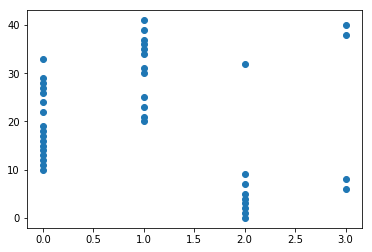

In [51]:
mat = Cdistance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)


#plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)

# Jaccard Similarity

In [38]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

Jsimilarity_matrix=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        Jsimilarity_matrix[i, j] = jaccard_similarity(word_weight_matrix[i], word_weight_matrix[j])
        
Jsimilarity_matrix

array([[1.        , 0.125     , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.125     , 1.        , 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.1       , 0.11111111, 1.        , ..., 0.09090909, 0.09090909,
        0.09090909],
       ...,
       [0.1       , 0.11111111, 0.09090909, ..., 1.        , 0.09090909,
        1.        ],
       [0.1       , 0.11111111, 0.09090909, ..., 0.09090909, 1.        ,
        0.09090909],
       [0.1       , 0.11111111, 0.09090909, ..., 1.        , 0.09090909,
        1.        ]])

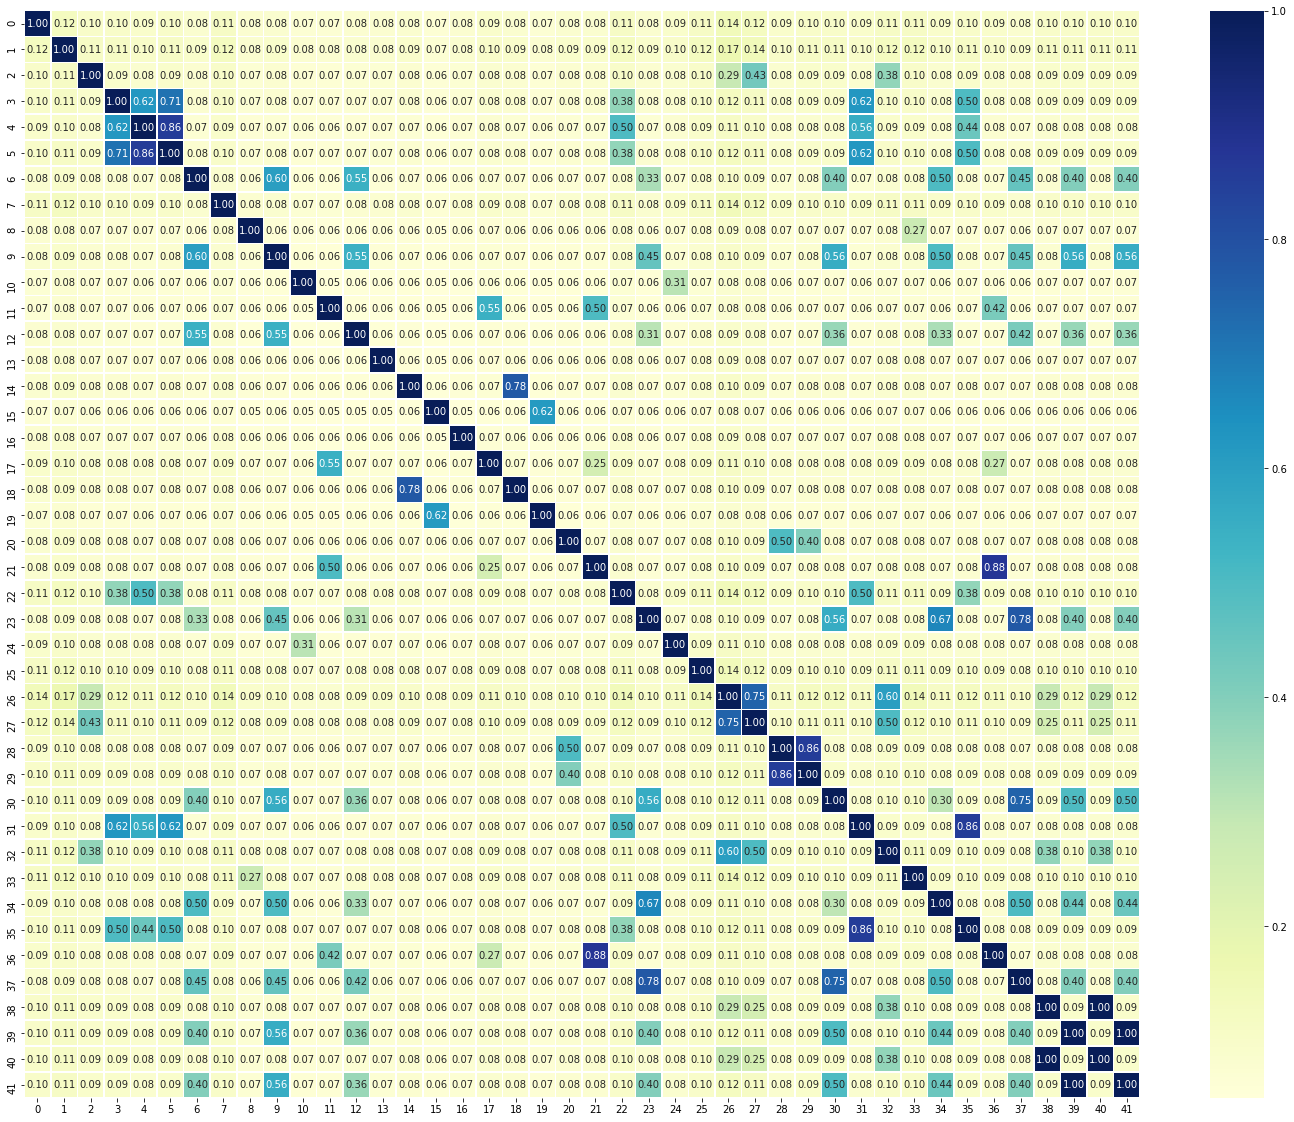

In [39]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Jsimilarity_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

In [40]:
Jdistance_matrix = 1 - Jsimilarity_matrix

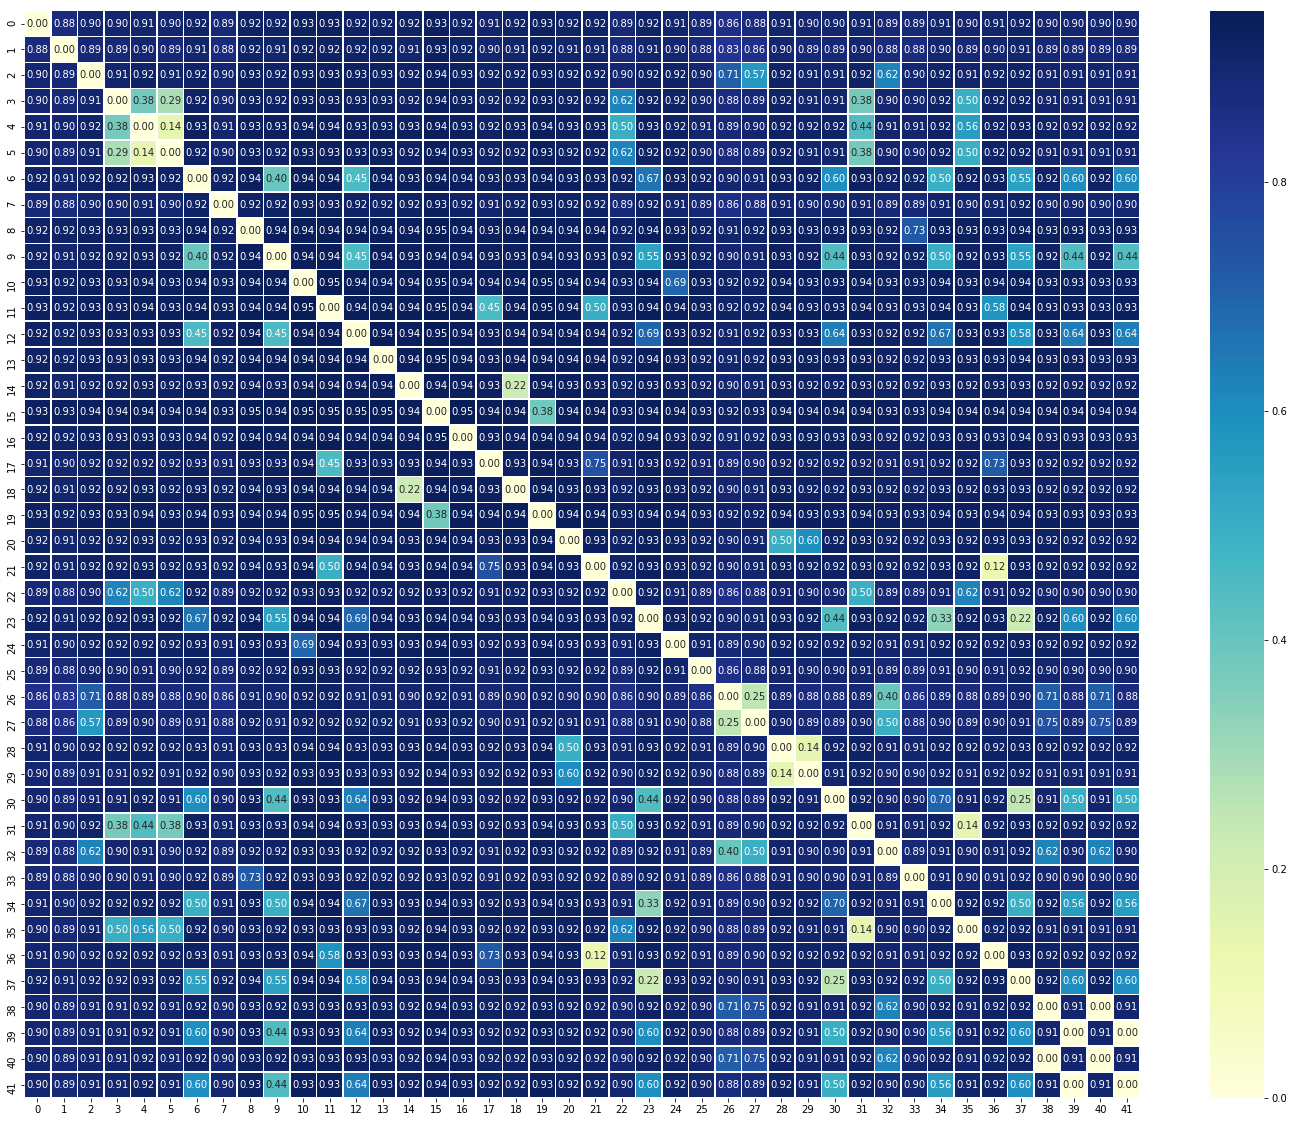

In [41]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Jdistance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

## Clustering

### K-Medoids

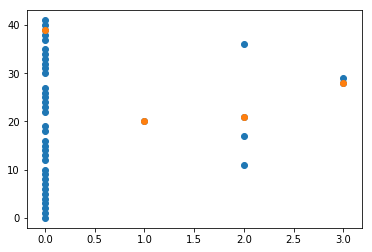

In [42]:
from pyclustering.cluster import kmedoids
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

##############################################################################################################################

matrix = Jdistance_matrix
M, C = kMedoids(matrix, 4)


##############################################################################################################################

a=np.empty(shape=len(line))
for i in range(len(C)):
    for j in (C[i]):
        a[j]=i
    

#plt.figure(figsize=(15,10))
plt.scatter(a, arr)
plt.scatter(m,M)

### K-Means

[0 0 3 1 1 1 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 1 2 0 0 3 3 0 0 2 1 3 0 2 1 0
 2 3 2 3 2]


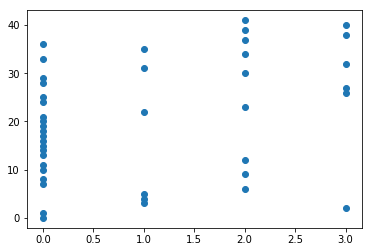

In [43]:
mat = Jdistance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)

for i in range(len(line)):
    arr[i] = i

#plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)

### PCA and visualization

In [44]:
np.shape(word_weight_matrix)

(42, 176)

In [54]:
reduced_data = PCA(n_components=2).fit_transform(word_weight_matrix)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
print(reduced_data)

[[ 0.46107218  0.82425802]
 [ 0.2850387   0.45429037]
 [ 0.4904981   1.03436348]
 [ 0.40325122  0.7878106 ]
 [ 0.52225717  1.04951823]
 [ 0.48768329  1.01472577]
 [ 0.30282683  1.22950849]
 [ 0.33730694  0.40502678]
 [ 0.18144416  1.09943019]
 [ 0.50593848  1.263203  ]
 [ 0.85655709 -0.81750252]
 [ 0.81345771 -0.41193109]
 [ 0.92139067 -0.63127956]
 [ 1.00820737 -0.94431588]
 [ 1.00117046 -0.8995297 ]
 [ 0.73328178 -0.56018473]
 [ 0.81434166 -0.73315043]
 [ 0.54667474 -0.63327259]
 [ 0.68112035 -0.61684243]
 [ 0.9292216  -0.5095403 ]
 [-0.6714998  -0.35723392]
 [-0.58842322 -0.35087891]
 [-0.47666505 -0.22438542]
 [-0.53685909 -0.37118736]
 [-0.43698081 -0.40877594]
 [-0.77677649 -0.11828515]
 [-0.44588843 -0.12906297]
 [-0.4054533  -0.21644891]
 [-0.48817279 -0.30305782]
 [-0.2689799  -0.16326516]
 [-0.84251233 -0.23535035]
 [-0.64793953 -0.2124021 ]
 [ 0.14994711  0.43119964]
 [ 0.11910682 -0.31044891]
 [-0.98690739  0.0460884 ]
 [-0.68335455 -0.22167491]
 [-0.99354639  0.04462459]
 

In [56]:
h = 0.002 

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

In [57]:
xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

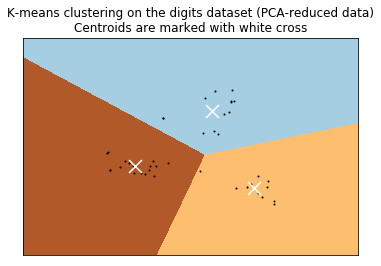

In [58]:
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()